# 

In [2]:
import cv2
import matplotlib.pyplot as plt
import json
import pandas as pd
import folium
import webbrowser
import os

ModuleNotFoundError: No module named 'folium'

In [3]:
image_path = 'cat.jpeg'
image = cv2.imread(image_path)

In [5]:
image.shape

(316, 474, 3)

In [3]:
image

array([[[ 12,  17,  26],
        [ 13,  18,  27],
        [ 14,  19,  28],
        ...,
        [ 28,  42,  60],
        [ 30,  44,  62],
        [ 30,  44,  62]],

       [[ 13,  18,  27],
        [ 13,  18,  27],
        [ 14,  19,  28],
        ...,
        [ 28,  42,  60],
        [ 30,  44,  62],
        [ 30,  44,  62]],

       [[ 13,  18,  27],
        [ 13,  18,  27],
        [ 14,  19,  28],
        ...,
        [ 28,  42,  60],
        [ 30,  44,  62],
        [ 30,  44,  62]],

       ...,

       [[ 82,  84,  95],
        [ 75,  77,  88],
        [ 65,  67,  78],
        ...,
        [ 75,  80,  95],
        [ 76,  81,  96],
        [ 79,  84,  99]],

       [[ 67,  71,  82],
        [ 57,  61,  72],
        [ 46,  50,  61],
        ...,
        [ 80,  85, 100],
        [ 83,  88, 103],
        [ 86,  91, 106]],

       [[ 75,  79,  90],
        [ 61,  65,  76],
        [ 46,  50,  61],
        ...,
        [ 82,  87, 102],
        [ 88,  93, 108],
        [ 91,  96, 111]]

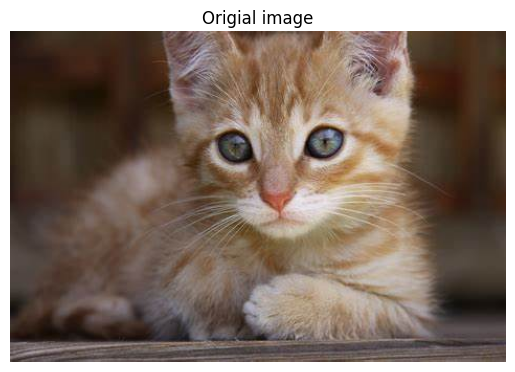

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Origial image")
plt.axis('off')
plt.show()

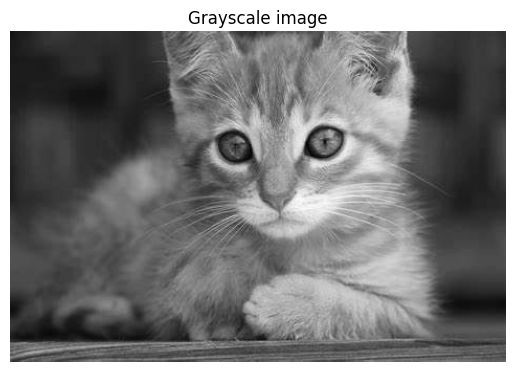

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale image")
plt.axis('off')
plt.show()

In [8]:
gray_image.shape

(316, 474)

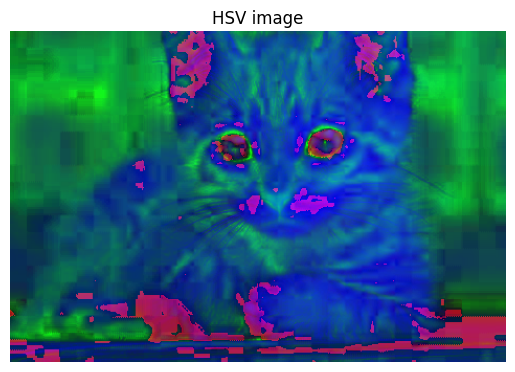

In [9]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.title("HSV image")
plt.axis('off')
plt.show()

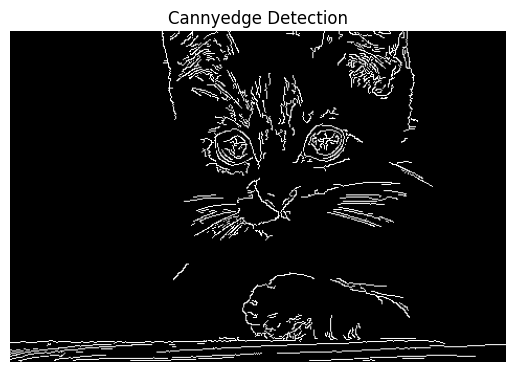

In [11]:
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
plt.imshow(edges, cmap='gray')
plt.title("Cannyedge Detection")
plt.axis('off')
plt.show()

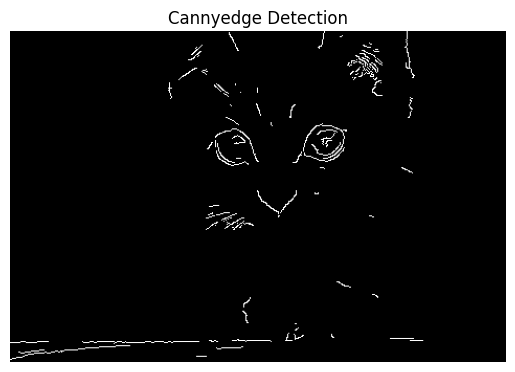

In [12]:
edges = cv2.Canny(gray_image, threshold1=300, threshold2=200)
plt.imshow(edges, cmap='gray')
plt.title("Cannyedge Detection")
plt.axis('off')
plt.show()

In [13]:
edges.shape

(316, 474)

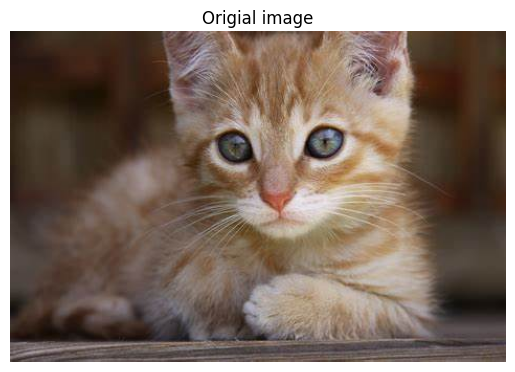

In [14]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Origial image")
plt.axis('off')
plt.show()

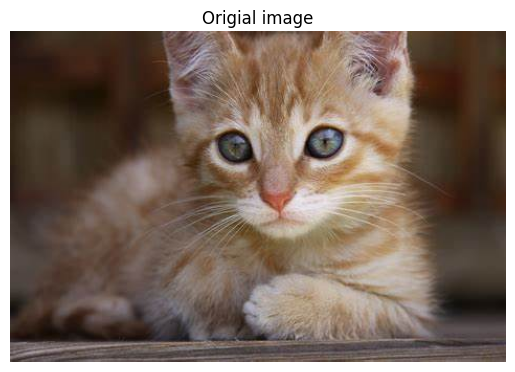

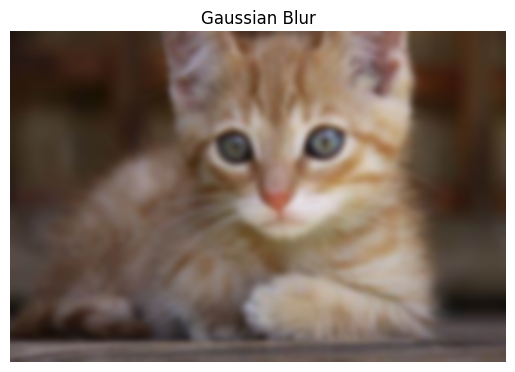

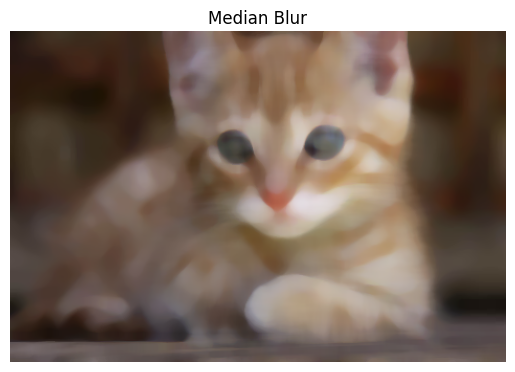

In [16]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Origial image")
plt.axis('off')
plt.show()

gaussian_blur = cv2.GaussianBlur(image_rgb, (15,15),0)
plt.imshow(gaussian_blur)
plt.title("Gaussian Blur")
plt.axis('off')
plt.show()

median_blur = cv2.medianBlur(image_rgb,15)
plt.imshow(median_blur)
plt.title("Median Blur")
plt.axis('off')
plt.show()

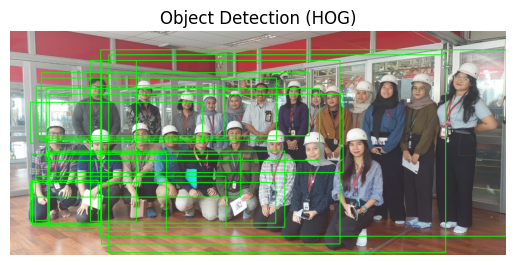

In [53]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

image_path = 'tour.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(rects, weights) = hog.detectMultiScale(image, winStride=(2,2), padding=(4,4), scale=1.05)

for (x,y,w,h) in rects:
    cv2.rectangle(image_rgb, (w,y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image_rgb)
plt.title("Object Detection (HOG)")
plt.axis('off')
plt.show()

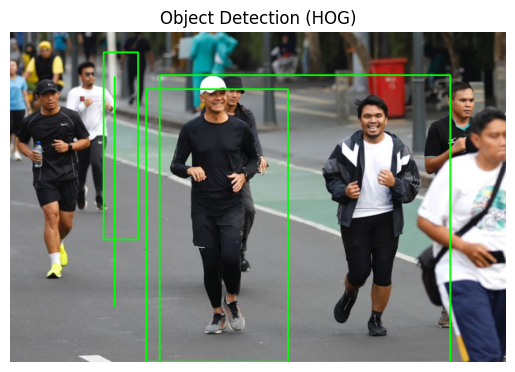

In [31]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

image_path = 'lari.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(rects, weights) = hog.detectMultiScale(image, winStride=(8,8), padding=(8,8), scale=1.05)

for (x,y,w,h) in rects:
    cv2.rectangle(image_rgb, (w,y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image_rgb)
plt.title("Object Detection (HOG)")
plt.axis('off')
plt.show()

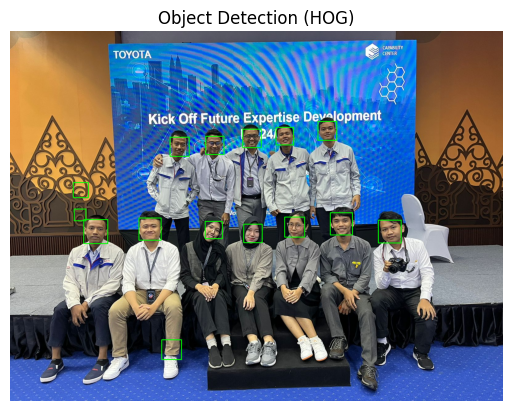

In [66]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
image = cv2.imread('cc3.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize= (30,30))

for (x,y,w,h) in faces:
    cv2.rectangle(image_rgb, (x,y), (x+w, y+h), (0, 255, 0),2)
plt.imshow(image_rgb)
plt.title("Object Detection (HOG)")
plt.axis('off')
plt.show()


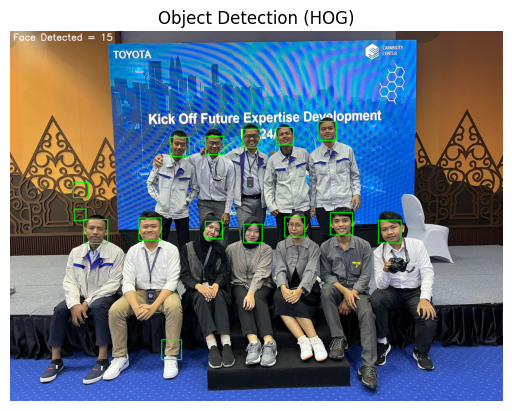

In [71]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
image = cv2.imread('cc3.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize= (30,30))
num_faces = len(faces)
cv2.putText(image_rgb, f"Face Detected = {num_faces}", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

for (x,y,w,h) in faces:
    cv2.rectangle(image_rgb, (x,y), (x+w, y+h), (0, 255, 0),2)
plt.imshow(image_rgb)
plt.title("Object Detection (HOG)")
plt.axis('off')
plt.show()
